In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_25205_I')

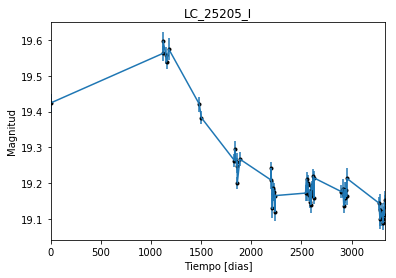

In [2]:
data = np.genfromtxt('LC_25205_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_25205_I')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

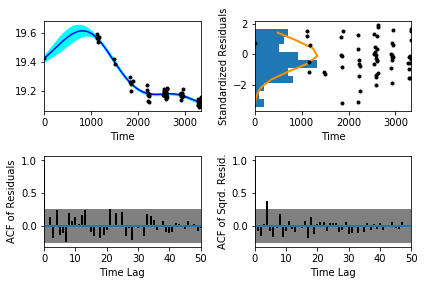

In [5]:
sample.assess_fit()

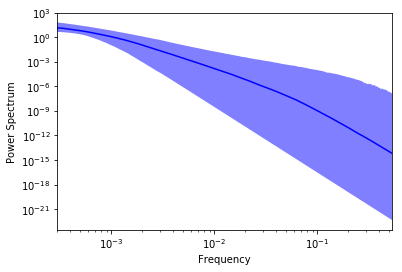

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_25205_I')

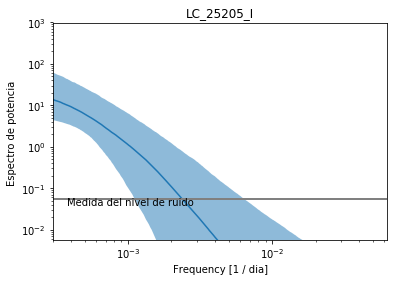

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_25205_I')


Text(0.5,1,'LC_25205_I')

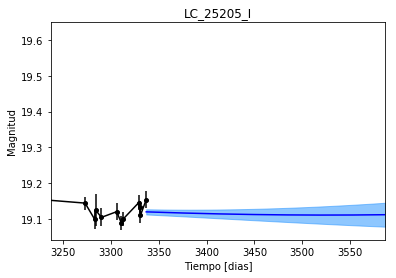

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')
plt.title('LC_25205_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_25205_I')

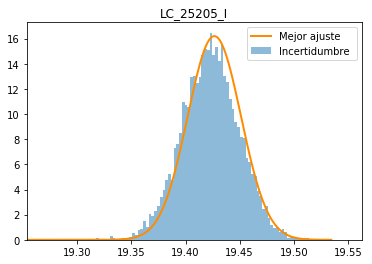

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_25205_I')

Text(0.5,1,'LC_25205_I')

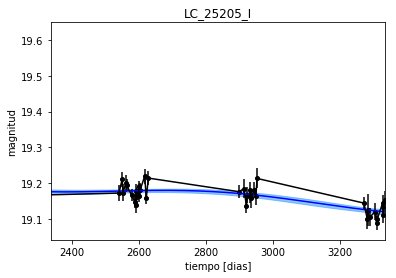

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')
plt.title('LC_25205_I')

Text(0.5,1,'LC_25205_I')

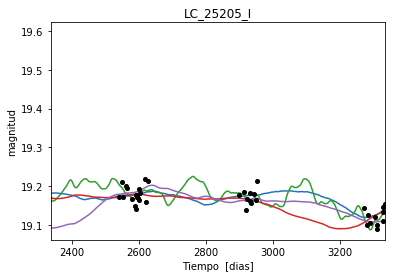

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')
plt.title('LC_25205_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 617.638358832
Median: 0.00627088591471
Standard deviation: 0.163891031958
68% credibility interval: [ 0.00042227  0.11064176]
95% credibility interval: [  3.09948619e-04   6.45777573e-01]
99% credibility interval: [  3.00174296e-04   9.45512969e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 235.497945703
Median: 0.000609802326703
Standard deviation: 0.0666062753505
68% credibility interval: [ 0.0003403   0.01295319]
95% credibility interval: [ 0.00030335  0.19985982]
99% credibility interval: [  3.00094087e-04   4.55146899e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 265.640639763
Median: 0.00806991846311
Standa

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 766.846431589
Median: 144.012392327
Standard deviation: 1.85065819412
68% credibility interval: [ 141.98992997  145.48534109]
95% credibility interval: [ 139.49705109  146.81260446]
99% credibility interval: [ 137.4919119  147.6041165]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 338.593109652
Median: 0.328939563604
Standard deviation: 1.99894477132
68% credibility interval: [ 0.03170322  2.85614338]
95% credibility interval: [ 0.01013039  6.72129718]
99% credibility interval: [  8.39798533e-03   1.05585450e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 256.540268161
Median: 0.0970012326988
Standard deviation: 7.34757282262
68% credibility interval: [  1.49773072e-03   4.07805748e+00]
95% credibility inter

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2900.29496173
Median: 7.17470053662e-24
Standard deviation: 2.95446729902e+68
68% credibility interval: [  9.04580646e-58   1.14166306e-05]
95% credibility interval: [  5.74231817e-121   9.10465751e+000]
99% credibility interval: [  2.95244821e-143   2.45229626e+002]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1084.31653605
Median: 19.3125712817
Standard deviation: 0.0918487087273
68% credibility interval: [ 19.23107824  19.39188824]
95% credibility interval: [ 19.12397623  19.50000928]
99% credibility interval: [ 19.04090521  19.58926805]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 374.01425696
Median: 0.000221304157976
Standard deviation: 0.206346942939
68% credibility interval: [ 0.          0.21389174]
95% credibility interval: [ 0.          0.78334964]
99% credibility interval: [ 0.          0.99039471]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 374.01425696
Median: 0.000221304157976
Standard deviation: 0.206346942939
68% credibility interval: [ 0.          0.21389174]
95% credibility interval: [ 0.          0.78334964]
99% credibility interval: [ 0.          0.99039471]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1233.86627251
Median: 0.0
Standard deviation: 0.000165508225141
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 766.846431589
Median: 144.012392327
Standard deviation: 1.85065819412
68% credibility interval: [ 141.98992997  145.48534109]
95% credibility interval: [ 139.49705109  146.81260446]
99% credibility interval: [ 137.4919119  147.6041165]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1143.44374243
Median: 0.0223932146983
Standard deviation: 0.0269444061834
68% credibility interval: [ 0.01314462  0.04480451]
95% credibility interval: [ 0.00852435  0.09170403]
99% credibility interval: [ 0.0067334   0.17357553]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 464.602102932
Median: 1.172578886
Standard deviation: 0.199434903257
68% credibility interval: [ 0.98349131  1.36973362]
95% credibility interval: [ 0.82394396  1.60492531]
99% credibility interval: [ 0.74260289  1.79697054]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 491.75789587
Median: 8.01107669799e-06
Standard deviation: 0.0707227838398
68% credibility interval: [  4.20555557e-08   6.51854224e-04]
95% credibility interval: [  7.59609681e-10   4.59398762e-02]
99% credibility interval: [  3.57547884e-10   2.75092935e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 617.638358832
Median: (-0.0394011382423-1.69182394403j)
Standard deviation: 1.65570375247
68% credibility interval: [-0.69518271+0.j -0.00265322+0.j]
95% credibility interval: [ -4.05754016e+00+0.j          -1.94746461e-03-0.00298539j]
99% credibility interval: [ -5.94083320e+00+0.j          -1.88605072e-03-0.12826427j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 235.497945703
Median: (-0.00383150101943+0j)
Standard deviation: 1.36238608202
68% credibility interval: [-0.08138731+1.09394442j -0.00213814+0.00131179j]
95% credibility interval: [-1.25575626+1.17772117j -0.00190603+0.j        ]
99% credibility interval: [ -2.85977231e+00 +2.81429096e+00j  -1.88554676e-03 +8.52417772e-04j]
Posterior summary for parameter